# Приложение к диплому
Создание, обучение и анализ моделей

** Импортирование библиотек **

In [285]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, classification_report
import pylab as plt
import mglearn
%matplotlib inline

## Чтение данных и первый взгляд

Первые пять строк данных

In [19]:
data = pd.read_excel('Data.xlsm')
data.head()

,"Stroke(AIS,TIA,AHS)",Sex01,StrokeAge,gFGB,gF2,gF5,gF7VII,gF13,gITGA,gITGB,...,gADD1 1378 G>T,gAGT T704C,gAGT C521T,gAGTR1 A 1166C,gAGTR2 G1675A,gCYP11B2 C344T,gGNB3 825C>T,gNOS3 T786C,gNOS3 G894T,DisNeuro01
0,AIS,1,1.0,0,0,0,0.0,1.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0
1,AIS,1,3.0,0,0,0,0.0,0.0,2.0,0.0,...,0.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,0
2,AIS,0,5.0,0,0,0,0.0,1.0,1.0,2.0,...,1.0,2.0,1.0,0.0,2.0,1.0,0.0,2.0,0.0,0
3,AIS,1,0.0,0,0,0,0.0,0.0,2.0,1.0,...,0.0,1.0,1.0,0.0,2.0,1.0,2.0,1.0,1.0,0
4,AIS,1,13.0,0,0,0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [20]:
# Краткое описание данных. Количество признаков, столбцов, типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 25 columns):
Stroke(AIS,TIA,AHS)    154 non-null object
Sex01                  154 non-null int64
StrokeAge              151 non-null float64
gFGB                   154 non-null int64
gF2                    154 non-null int64
gF5                    154 non-null int64
gF7VII                 148 non-null float64
gF13                   148 non-null float64
gITGA                  151 non-null float64
gITGB                  152 non-null float64
gPAI-1                 153 non-null float64
gMTR:2756A>G           148 non-null float64
gMTRR:66A>G            148 non-null float64
gMTHFR677СT            152 non-null float64
gMTHFR:1298A>C         148 non-null float64
gADD1 1378 G>T         71 non-null float64
gAGT T704C             72 non-null float64
gAGT C521T             72 non-null float64
gAGTR1 A 1166C         72 non-null float64
gAGTR2 G1675A          72 non-null float64
gCYP11B2 C344T         72 non

In [21]:
# Стандартное отклонение, среднее, персентели
data.describe()

,Sex01,StrokeAge,gFGB,gF2,gF5,gF7VII,gF13,gITGA,gITGB,gPAI-1,...,gADD1 1378 G>T,gAGT T704C,gAGT C521T,gAGTR1 A 1166C,gAGTR2 G1675A,gCYP11B2 C344T,gGNB3 825C>T,gNOS3 T786C,gNOS3 G894T,DisNeuro01
count,154.000000,151.000000,154.000000,154.000000,154.000000,148.000000,148.000000,151.000000,152.000000,153.000000,...,71.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,81.000000,81.000000,154.000000
mean,0.655844,3.350993,0.577922,0.045455,0.064935,0.162162,0.594595,0.880795,0.388158,1.176471,...,0.577465,0.958333,0.333333,0.486111,1.097222,1.125000,0.541667,1.074074,0.567901,0.474026
std,0.476642,4.650733,0.634338,0.208979,0.272373,0.421433,0.668411,0.692119,0.540411,0.708201,...,0.710372,0.700855,0.530745,0.581234,0.921721,0.710832,0.626583,0.720725,0.650736,0.500954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,4.500000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000
max,1.000000,17.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


**Матрица корреляции**

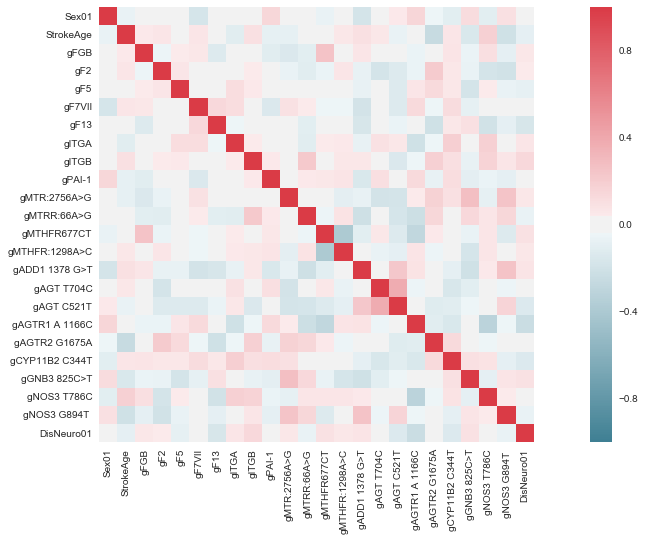

In [22]:
f, ax = plt.subplots(figsize=(20, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [23]:
corr["DisNeuro01"].sort_values(ascending=False)

DisNeuro01        1.000000
gITGB             0.138482
gGNB3 825C>T      0.091182
gMTHFR677СT       0.086830
gADD1 1378 G>T    0.071442
gITGA             0.068866
gMTR:2756A>G      0.058541
gFGB              0.057830
gMTHFR:1298A>C    0.057457
gF2               0.042567
gNOS3 T786C       0.035752
gAGTR2 G1675A     0.018132
gF7VII           -0.016536
gAGT T704C       -0.021628
Sex01            -0.023996
gPAI-1           -0.034895
gMTRR:66A>G      -0.064812
gNOS3 G894T      -0.065524
gF5              -0.083360
StrokeAge        -0.093313
gCYP11B2 C344T   -0.132865
gAGT C521T       -0.140600
gF13             -0.166811
gAGTR1 A 1166C   -0.241394
Name: DisNeuro01, dtype: float64

** Предварительная подготовка данных. Отчистка и скалирование **

In [256]:
def learning_curve_model(X, Y, model, cv, train_sizes):

    plt.figure(figsize=(10, 10))
    plt.title("Learning curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")


    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
                     
    plt.legend(loc="best")
    return plt

In [272]:
# Убираем строки с пустыми значениями
data = data.dropna()
# Разбиение на предикаторы и зависимум переменную
predicators = data.drop(["DisNeuro01",  "Stroke(AIS,TIA,AHS)"], axis=1)
neuro = data["DisNeuro01"].copy()
# Преобразуем Stroke(AIS,TIA,AHS) 
# Разбиваем данные на train и test выборки
predicators_train, predicators_test, neuro_train, neuro_test = train_test_split(predicators, neuro, random_state=42, test_size=.10)
# Скалируем данные std=1 и median=0
# TODO PIPE
std_scaler = StandardScaler()
std_scaler.fit(predicators_train)
predicators_train_scaled = std_scaler.transform(predicators_train)
predicators_test_scaled = std_scaler.transform(predicators_test)

#predicators_train_scaled = predicators_train
#predicators_test_scaled = predicators_test

cv = StratifiedKFold(n_splits=3, random_state=0)

**Логистическая регрессия**

In [273]:
grid_search = GridSearchCV(LogisticRegression(), {"C": np.linspace(0.001, 20, 200), "penalty": ["l2", "l1"]}, cv=cv)
grid_search.fit(predicators_train_scaled, neuro_train)
log_reg = grid_search.best_estimator_
print("Best params: ", grid_search.best_params_, " best score: ", grid_search.best_score_)

Best params:  {'C': 0.70448241206030149, 'penalty': 'l1'}  best score:  0.619047619048


In [274]:
print("На тренировочной выборке:", log_reg.score(predicators_train_scaled, neuro_train), "На тестовой выборке: ", log_reg.score(predicators_test_scaled, neuro_test))

На тренировочной выборке: 0.809523809524 На тестовой выборке:  0.375


<module 'pylab' from '/home/user/Desktop/machine_learning/myvenv/lib/python3.6/site-packages/pylab.py'>

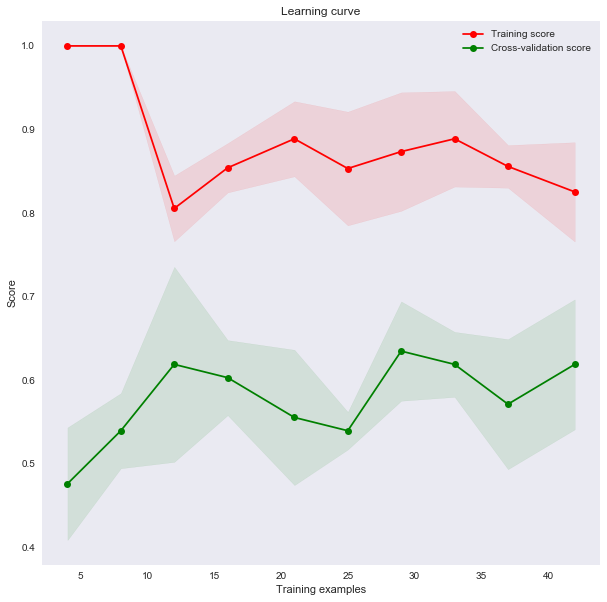

In [275]:
learning_curve_model(predicators_train_scaled, neuro_train, log_reg, cv, np.linspace(.1, 1.0, 10))

(-5, 5)

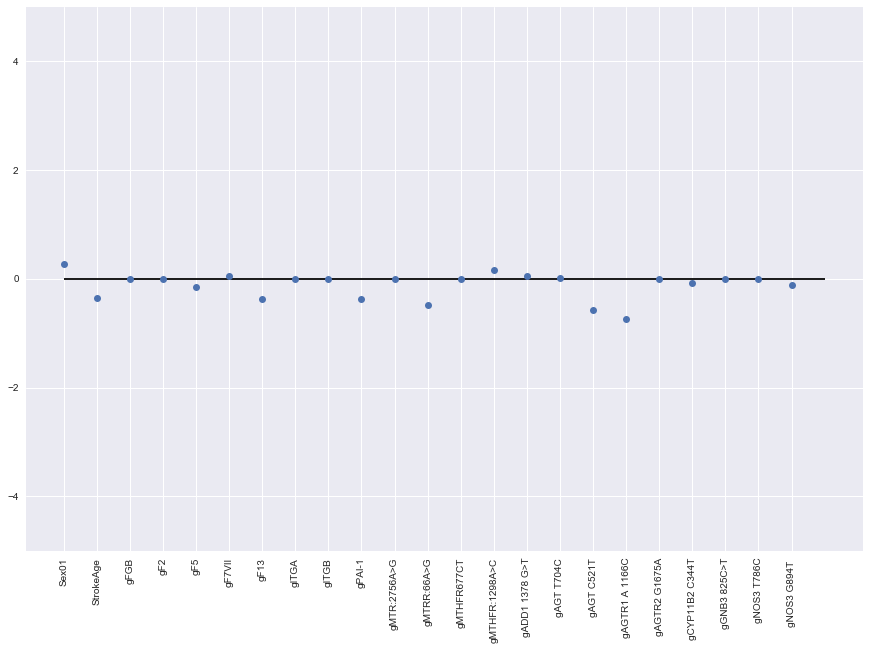

In [276]:
plt.figure(figsize=(15,10))
plt.plot(log_reg.coef_.T, 'o', label='Коэффициенты логит. регресии')
plt.xticks(range(predicators.shape[1]), predicators.columns, rotation=90)
plt.hlines(0, 0, predicators.shape[1])
plt.ylim(-5, 5)

In [284]:
pred_log_reg = log_reg.predict(predicators_train_scaled)
confusion = confusion_matrix(neuro_train, pred_log_reg)
print(classification_report(neuro_train, pred_log_reg))

             precision    recall  f1-score   support

          0       0.82      0.77      0.79        30
          1       0.80      0.85      0.82        33

avg / total       0.81      0.81      0.81        63



In [282]:
print("F1 score: ", f1_score(neuro_train, pred_log_reg))

F1 score:  0.823529411765


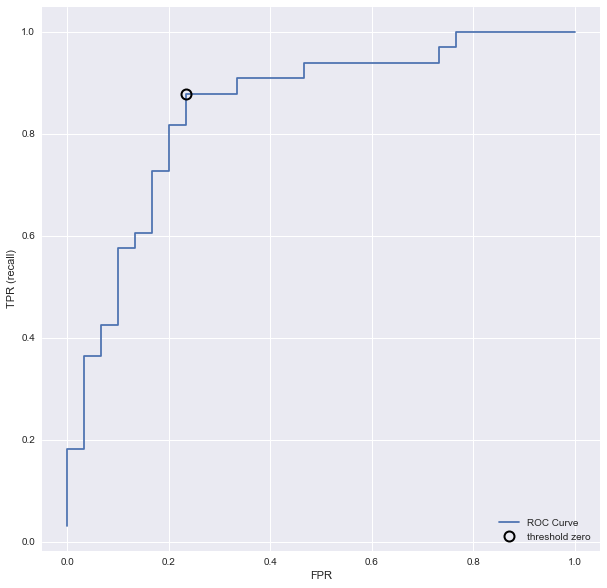

In [292]:
plt.figure(figsize=(10, 10))
fpr, tpr, thresholds = roc_curve(neuro_train, log_reg.decision_function(predicators_train_scaled))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)